In [ ]:
# Student Name: Aaron Baggot
# Student Number: C22716399
# Features: Task 2 - Corners Detection using Harris and Shi-Tomasi Methods

# Task : Corners
# 1. Open “Sudoku.jpg”;
# 2. Create a Harris corner image for this image;
# Use Shi-Tomasi to find the location of the strongest corners.
# Advanced Task:
# Plot the Shi-Tomasi corners on the Harris image.



# The code loads the Sudoku image and converts it to grayscale for easier processing.
# It then applies the Harris corner detector to identify corner-like regions based on intensity changes and marks them in red.
# Next, it uses the Shi-Tomasi method (cv2.goodFeaturesToTrack) to find the strongest and most accurate corner points, 
# which are drawn in green on the image.
# Finally, both the Harris and Shi-Tomasi results are displayed side by side for comparison, 
# showing general corner regions (Harris) and precise corner points (Shi-Tomasi).

# [1] “How does Shi Tomasi Corner Detector work in OpenCV -,” ProjectPro. Accessed: Nov. 11, 2025. [Online]. Available: https://www.projectpro.io/recipes/does-shi-tomasi-corner-detector-work-opencv



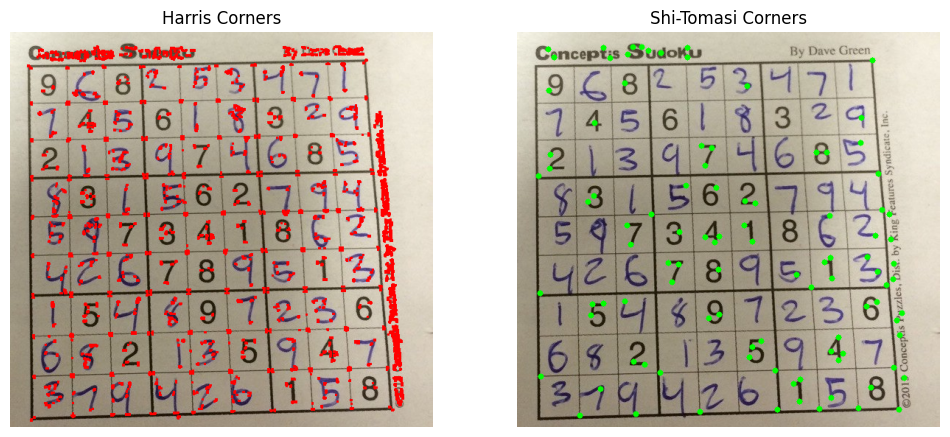

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('/Users/aaronbaggot/Desktop/image-processing-labs/data/samples/sudoku.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

# 2. Create a Harris corner image
harris = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
harris = cv2.dilate(harris, None)  # Make corners more visible

# Threshold to mark corners on the image
harris_img = img.copy()
harris_img[harris > 0.01 * harris.max()] = [0, 0, 255]  # red corners

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(harris_img, cv2.COLOR_BGR2RGB))
plt.title('Harris Corners')
plt.axis('off')

# Use Shi-Tomasi to find strongest corners
corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=10)
corners = corners.astype(int)

shi_img = img.copy()
for c in corners:
    x, y = c.ravel()
    cv2.circle(shi_img, (x, y), 4, (0, 255, 0), -1)  # green points

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(shi_img, cv2.COLOR_BGR2RGB))
plt.title('Shi-Tomasi Corners')
plt.axis('off')
plt.show()
